# Лекция №1 


## Работа с растровыми изображенями

Растровое изображение - изображение, представляющее собой сетку пикселей — цветных точек. 
Важными характеристиками изображения являются: размер, глубина цвета и цветовое пространство.

<img src="img/RGB_cube.png" alt="Drawing" style="width: 300px;"/>

Самый распространённый способ выделить объект — это цвет.

__Цвет__ — это свойство тел отражать или испускать видимое излучение определенного спектрального состава и интенсивности.

Трихроматическая теория (сетчатка глаза имеет 3 вида рецепторов света, ответственных за цветное зрение) полагает, что достаточно всего трёх чисел, чтобы описать цвет (красный, синий, зелёный). Т.е. используя три значения __R, G, B__  

Цветовые пространства бывают линейные и нелинейные.
К линейным относится __RGB__. Изучим его подробней.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

## отображение графиков в ноутбуке
%matplotlib inline

In [18]:
## считаем изображение
img  = cv2.imread('img/RGB_cube.png')

img_plt = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2BGR)

In [19]:
## посмотрим что это за объект
type(img)

numpy.ndarray

In [20]:
## размерность массива
img.shape

(457, 640, 3)

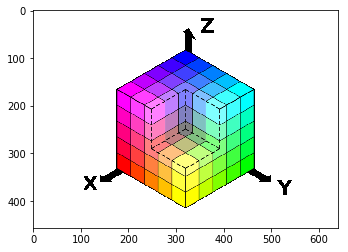

In [23]:
## отобразим объект
plt.imshow(img_plt);

### Grayscale

__Grayscale__ — цветовой режим изображений, которые отображаются в оттенках серого цвета, размещённые в виде таблицы в качестве эталонов яркости белого цвета.

В компьютерном представлении широко распространённая серая шкала использует на каждый пиксел изображения один байт (8 бит) информации. Такая шкала передаёт 256 оттенков (градаций) серого цвета, или яркости (значение 0 представляет чёрный цвет, а значение 255 — белый).

<img src="img/gray_scale.png" alt="Drawing" style="width: 200px;"/>

Преобразование цветного изображения в оттенки серого из RGB пересчитывают по формуле:

\begin{align}
\ Y' & = 0.2126R + 0.7152G + 0.0722B \\
\end{align}

In [24]:
## создадим grayscale изображение с помощью openCV
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)

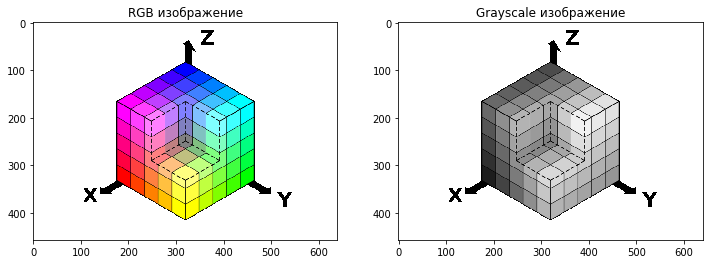

In [25]:
## поглядим, что мы считали
fig, m_axs = plt.subplots(1, 2, figsize = (12, 8))
ax1, ax2 = m_axs

ax1.set_title('RGB изображение')
ax1.imshow(img_plt)

ax2.set_title('Grayscale изображение')
ax2.imshow(gray, cmap='gray');

### Поиграемся с каналами

Посмторим на картинку, где есть только красный, зеленый и синий

In [14]:
img_data = img.copy()

r = img_data[:,:,0]
r[r != 255] = 0

g = img_data[:,:,1]
g[g != 255] = 0

b = img_data[:,:,2]
b[b != 255] = 0

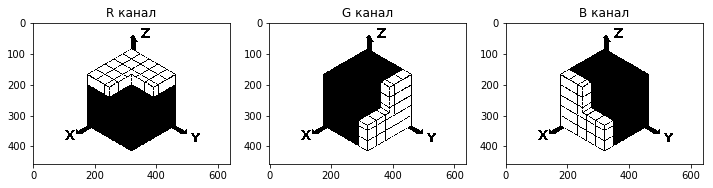

In [29]:
## посмотрим на результат
fig, m_axs = plt.subplots(1, 3, figsize = (12, 8))
ax1, ax2, ax3 = m_axs

ax1.set_title('R канал')
ax1.imshow(r, cmap='gray')

ax2.set_title('G канал')
ax2.imshow(g, cmap='gray')

ax3.set_title('B канал')
ax3.imshow(b, cmap='gray');

Почему так получилось?

Давайте изменим конфигурацию каналов, чтобы посмотреть на изменения. 

In [30]:
img_data = img.copy()

r = img_data[:,:,0]
r[r < 100] = 0

g = img_data[:,:,1]
g[g < 100] = 0

b = img_data[:,:,2]
b[b < 100] = 0

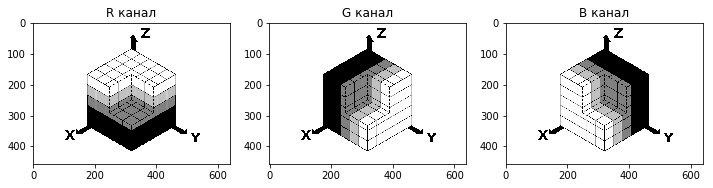

In [33]:
## посмотрим на результат
fig, m_axs = plt.subplots(1, 3, figsize = (12, 8))
ax1, ax2, ax3 = m_axs

ax1.set_title('R канал')
ax1.imshow(r, cmap='gray')
ax2.set_title('G канал')
ax2.imshow(g, cmap='gray')
ax3.set_title('B канал')
ax3.imshow(b, cmap='gray');

## Поиск по цвету

Бывают задачи, в которых отличительной особенностью предмета являтются его цветовые признаки. Рассмотрим пример:

<img src="img/cat.jpg" alt="Drawing" style="width: 300px;"/>

Как мы можем в этом найти кота? Для начала мы можем оценить глазами, что цвет кота отличается от цвета окружения – он ярко рыжий и отлично виден в траве. Как мы можем выделить этот цвет в OpenCV3? Для этого существует специальная функция __cv2.inRange()__, она принимает на вход изображение и диапазон цвета, который мы хотим выделить. На выходе мы получаем черно-белое изображение, где белым выделены пиксели, цвета которых попадали в диапазон а черным – с цветом вне требуемого. Попробуем выделить на изображении кота:

In [35]:
cat_image  = cv2.imread('img/cat.jpg')


## значения цвета можно посмотреть в gimp или paint
low_red = (17,50,110)
high_red = (101,140,180)

only_cat = cv2.inRange(cat_image, low_red, high_red)
cv2.imshow('only car', only_cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

__Кот в RGB – не кот. Выбираем цветовое пространство.__

С данным изображением мы уже можем работать, но что-то в нем не то. Кот выделен не целиком, и есть много лишних точек. На самом деле, мы научимся даже из такого получать много полезной информации, но в данный момент мы сделаем одно очень важное и правильное улучшение. Как вы могли заметить – мы работаем с изображением в пространстве __RGB__. У данного пространства, кроме не очевидной для человеческого восприятия записи цвета, есть еще один недостаток в нашем случае. Чтобы его понять, рассмотрим что из себя представляет __RGB__:

![title](img/RGB_coub.png)

Пространство представляет из себя куб с длинной стороны 256, где любой цвет задается координатами соответствующей точки на данном кубе. Данная концепция получила широкое распространение из-за того, что в случае формирования цвета на экране устройства, такого как телефон или монитор компьютера, изображение формируется за счет точек трех цветов – синего, зеленого, и красного. Теперь перейдем к нашей функции __cv2.inRange()__. Она принимает набор из двух цветов – точек на данном кубе. Что в таком случае мы будем считать за цвет, который удовлетворяет нашим критериям? Для ответа на данный вопрос нарисуем схематично тот же самый куб RGB:

![title](img/RGB_sheme.png)

На данной схеме становится понятно, что пространство между двумя заданными точками цвета также является кубом RGB. Таким образом, наша функция находит вложенный цветовой куб в полном кубе RGB. Кроме того, что это может непонятно звучать, это и работает не самым лучшим образом: представим что мы хотим найти оттенки пурпурного цвета, в таком случае мы размещаем наш вложенный куб как можно ближе к пурпурному. Но при таком размещении, мы так или иначе затрагиваем все остальные цвета, из-за того, что стороны куба параллельны основному. Как в таком случае поступить?

Мы не первые,кто сталкивается с такой задачей и такой проблемой. И одно из существующих решений – переход в другое цветовое пространство. Если поставить задачей, что во главе угла у нас фиксируется оттенок цвета или соотношение между RGB, то мы приходим к следующей схеме:

![title](img/RGB_HSV_trans.png)

В данной модели мы переходим к следующим координатам – __цветовой тон, насыщенность и светлота__. Именно в данных понятиях люди обычно описывают цвета. 

Под цветовым тоном (__Hue__) имеют в виду именно цвет (длину волны). 

Насыщенность (__Saturation__) характеризует близость цвета к белому (розовый ближе к белому чем красный). 

Яркость (__Intensity__) описывается всех сложнее и в модели HSI ее можно описать как общую яркость точки или цвета.

Все серые цвета (лежащие на диагонали куба) при этом проецируются в центральную точку. Чтобы с помощью этой модели можно было закодировать все цвета, доступные в RGB-модели, необходимо добавить вертикальную ось яркости (или интенсивности) (I). В итоге получается шестигранный конус:

![title](img/HSV_sheme.png)

В данном конусе диапазон выбранных цветов будет представлять из себя конический слой. Его главные для нас атрибуты: он лежит по оттенку в заданных пределах, в отличии от RGB, его светлота и интенсивность также определяются просто и очевидно в описании цветового предела. Благодаря таким удобным и полезным свойствам данное цветовое пространство заслужило большую любовь как среди дизайнеров, так и особенно среди общества разработчиков компьютерного зрения. 

В OpenCV3 данное цветовое пространство имеет обозначение __HSV__. Переведем наше изображение в него и снова найдем котейку:

In [39]:
img  = cv2.imread('img/cat.jpg')
img_hsv = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(img_hsv)

hsv_low_g = (100, 50, 50)
hsv_high_g = (120, 250, 255)
cat_area = cv2.inRange(img_hsv, hsv_low_g, hsv_high_g)

cv2.imshow('img', img)
cv2.imshow('green', cat_area)
cv2.waitKey(0)
cv2.destroyAllWindows()

Тут я лишь остановлюсь на моменте выбора цвета, в данном примере мы руководствовались лишь собственным глазом и оценкой того, какой цвет мы хотим найти. Этим __HSV__ замечательно отличается от __RGB__, в которой нам необходимо каждый цвет искать в справочнике или использовать сторонние программы. Однако в конечных продуктах следует использовать более умную методику выбора диапазонов, которую я покажу на других фотографиях.

***
### Посмотреть дргуие примеры работы с HSV
***

### Домашнаяя работа #1

Первой задачей по машинному зрению будет работа с геометрическими фигурами. 
Ваша задача - написать программу, которая посчитает радиус круга, сторону квадрата и катет равнобедренного прямоугольного треугольника, изображенных на картинке. 

Важно, что в данной задаче цвет каждой геометрической фигуры остается неизменным на всех изображениях.

Примеры изображений:
<img src="src/rgb_fig/task_img/test_image_00.jpg" alt="Drawing" style="width: 200px;"/>
<img src="src/rgb_fig/task_img/test_image_01.jpg" alt="Drawing" style="width: 200px;"/>

## Введение в линейную алгебру

### Матрицы и вектора 

Матрица имеет вид :
$$
\begin{Vmatrix}
\ a_{1,1} & a_{1,2} &  \dots & a_{1,n} \\
\ a_{2,1} & a_{2,2} & \dots & a_{2,n} \\
\dots & \dots & \dots & \dots  \\
\ a_{m,1} & a_{m,2} & \dots & a_{m,n}
\end{Vmatrix} \
$$

$$
\ i-я \ строка \ матрицы \ A(i,) = (a_{i,1} \ a_{i,2} \ ... \ a_{i,n}); 
$$

#### ... оформить теорию по матрицам ... 

#### Операции над матрицами

Сложение матриц
Складывать можно только матрицы одинакового размера.

Сложение матриц $A+B$ есть операция нахождения матрицы $C$, все элементы которой равны попарной сумме всех соответствующих элементов матриц $A$ и $B$, то есть каждый элемент матрицы $C$ равен: $$c_{i,j} = a_{i,j} + b_{i,j}$$

##### Свойства сложения матриц:

$1)$ коммутативность: $A+B = B+A$

$2)$ ассоциативность: $(A+B)+C =A+(B+C)$;

$3)$ сложение с нулевой матрицей: $A + Θ = A$;

$4)$ существование противоположной матрицы: $A + (-A) = Θ$;

In [66]:
## матрицы в numpy

A = np.array(([1, 1 ,1])).reshape((3,1))
B = np.array(([1, 1 ,1])).reshape((1,3))

In [67]:
## примерчик 1 
np.dot(A, B)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [69]:
## примерчик 2
np.dot(B, A)

array([[3]])

In [75]:
A = np.array([[1,1,1], [2, 2, 2], [3,3,3]])
B = np.array([[3,3,3], [2, 2, 2], [1,1,1]])

In [82]:
C = A + B
print(A, '\n\n', B, '\n\n', C)

[[1 1 1]
 [2 2 2]
 [3 3 3]] 

 [[3 3 3]
 [2 2 2]
 [1 1 1]] 

 [[4 4 4]
 [4 4 4]
 [4 4 4]]


In [83]:
A * 2

array([[2, 2, 2],
       [4, 4, 4],
       [6, 6, 6]])

### Операции с матрицами 

## Афинные преобразования

https://ru.wikiversity.org/wiki/%D0%90%D1%84%D1%84%D0%B8%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F

http://mathhelpplanet.com/static.php?p=affinnye-pryeobrazovaniya-ploskosti-i-prostranstva

Преобразование плоскости задается двумя скалярными функциями двух переменных:

$ \begin{cases}y_1=f_1(x_1,x_2),\\y_2=f_2(x_1,x_2).\end{cases} $ или аналогично через вектор-функцию $ \begin{pmatrix}f_1(x); & f_2(x)\end{pmatrix}^T $

#### Формула аффинного преобразования плоскости

Пусть на плоскости фиксирована аффинная система координат $ O \overrightarrow{e_1}  \overrightarrow{e_2} $. Преобразование __A__ плоскости называется аффинным, если координаты __y1,y2__ образа __Y__ выражаются через координаты __x1,x2__ прообраза X (Y=A(X)) по формулам:

$$
\begin{cases} y_1=a_1+ a_{11}x_1+ a_{12}x_2,\\ y_2= a_2+a_{21}x_1+a_{22}x_2,\end{cases} \ \Leftrightarrow\quad 
\begin{equation} y = A \cdot x \end{equation}
$$

где матрица 
$
\begin{equation*}
\ A = \begin{vmatrix}
a_{11} \ a_{12} \\ 
a_{21} \ a_{22} \\  
\end{vmatrix}
\end{equation*}
$
— невырожденная матрица (матрица аффинного преобразования).

### Сдвиг изображения

In [41]:
img = cv2.imread('img/lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Translation is the shifting of object's location. If you know the shift in (x,y) direction, let it be (tx,ty), you can create the transformation matrix M as follows:

$$
\begin{equation*}
\ A = \begin{vmatrix}
1 & \ 0 & \ t_x \\ 
0 & \ 1 & \ t_y \\  
\end{vmatrix}
\end{equation*}
$$

You can take make it into a Numpy array of type np.float32 and pass it into cv2.warpAffine() function. See below example for a shift of different shift:

Раземер исходного изображения: (768, 1024, 3)


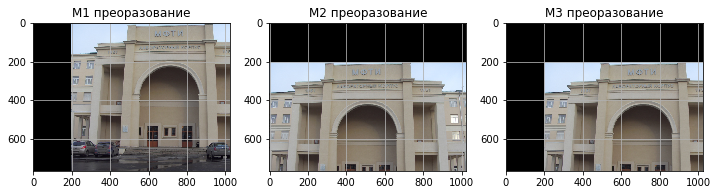

In [56]:
## сдвиг изображения

## посмотрим на размер изображения
print('Раземер исходного изображения:', img.shape)
rows, cols, _ = img.shape

## матрица афинного преобразования
M1 = np.float32([[1, 0, 200], [0, 1, 0]])
M2 = np.float32([[1, 0, 0], [0, 1, 200]])
M3 = np.float32([[1, 0, 200], [0, 1, 200]])

## визуализация
fig, m_axs = plt.subplots(1, 3, figsize=(12,8))
ax1, ax2, ax3 = m_axs

dst1 = cv2.warpAffine(img, M1, (cols, rows))
ax1.imshow(dst1)
ax1.grid()
ax1.set_title('M1 преоразование')
dst2 = cv2.warpAffine(img, M2, (cols, rows))
ax2.imshow(dst2)
ax2.grid()
ax2.set_title('M2 преоразование')
dst3 = cv2.warpAffine(img, M3, (cols, rows))
ax3.imshow(dst3)
ax3.grid()
ax3.set_title('M3 преоразование');

### Поворот изображения

Rotation of an image for an angle θ is achieved by the transformation matrix of the form


$$
\begin{equation*}
\ M = \begin{vmatrix}
\cos(\theta) & \ -\sin(\theta) \\ 
\sin(\theta) & \ \cos(\theta) \\  
\end{vmatrix}
\end{equation*}
$$

But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. Modified transformation matrix is given by

$$
\begin{equation*}
\ M = \begin{vmatrix}
\alpha & \ -\beta & \ (1-\alpha)\cdot center.x - \beta \cdot center.y \\ 
\beta & \ \alpha & \ \beta \cdot center/x + (1-\alpha) \cdot center.y \\  
\end{vmatrix}
\end{equation*}
$$

where: 

$$
\alpha = scale \cdot \cos(\theta) \\
\beta = scale \cdot \sin(\theta) \\ 
$$ 

As a resulut for rotate coordinate is:

$$
\begin{equation}
\begin{vmatrix} \ x' \\ \ y' \\ \end{vmatrix} = 
\begin{vmatrix}
\alpha & \ -\beta & \ (1-\alpha)\cdot center.x - \beta \cdot center.y \\ 
\beta & \ \alpha & \ \beta \cdot center/x + (1-\alpha) \cdot center.y \\ 
\end{vmatrix} \cdot 
\begin{vmatrix} \ x \\ \ y \\ 1 \\ \end{vmatrix}
\end{equation}
$$

where:

$$
\ (x', y') - \ new \ coordinates \\
\ (x, y) - \ old \ coordinates \\ 
$$


To find this transformation matrix, OpenCV provides a function, __cv2.getRotationMatrix2D__. Check below example which rotates the image by 90 degree with respect to center without any scaling.

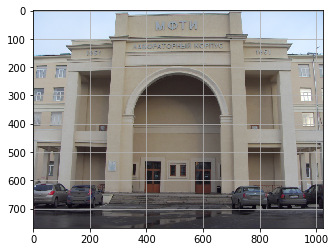

In [6]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, scale=1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result


plt.grid()
plt.imshow(rotateImage(img.copy(), 0));

#### Трансформация точек

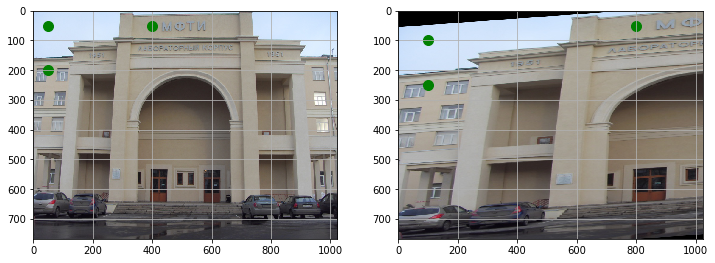

In [7]:
pts1 = np.float32([[50,50],[400,50],[50,200]])
pts2 = np.float32([[100,100],[800,50],[100,250]]) 

M = cv2.getAffineTransform(pts1,pts2) 
dst = cv2.warpAffine(img,M,(cols,rows))

fig, m_axs = plt.subplots(1, 2, figsize=(12,8))
ax1, ax2 = m_axs

dst1 = cv2.warpAffine(img, M, (cols, rows))
ax1.imshow(img)
ax1.grid()
ax1.scatter([50, 400, 50], [50, 50, 200], color='g', s=100)

dst2 = cv2.warpAffine(img, M2, (cols, rows))
ax2.imshow(dst)
ax2.grid()
ax2.scatter([100, 800, 100], [100, 50, 250], color='g', s=100)

#### Перспектива

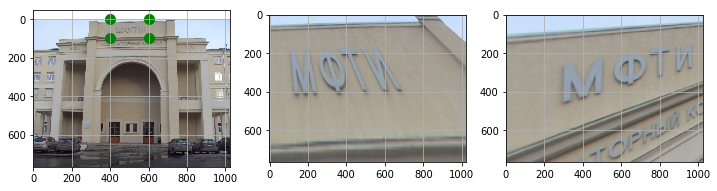

In [55]:
rows, cols, _ = img.shape

pts1 = np.float32([[400,0],[600,0],[400,100], [600, 100]])
pts2 = np.float32([[0,0],[cols/2,0],[0,rows], [cols,rows]]) 
pts3 = np.float32([[0,0],[cols,0],[0,rows], [cols,rows/2]]) 


M2 = cv2.getPerspectiveTransform(pts1,pts2) 
M3 = cv2.getPerspectiveTransform(pts1,pts3) 


fig, m_axs = plt.subplots(1, 3, figsize=(12,8))
ax1, ax2, ax3 = m_axs

ax1.imshow(img)
ax1.grid()
ax1.scatter([400, 600, 400, 600], [0, 0, 100, 100], color='g', s=100)

dst2 = cv2.warpPerspective(img, M2, (cols, rows))
ax2.imshow(dst2)
ax2.grid()

dst3 = cv2.warpPerspective(img, M3, (cols, rows))
ax3.imshow(dst3)
ax3.grid()

#### ROI

In [ ]:
roi = cv2.selectROI(img)
imCrop = img[int(roi[1]):int(roi[1]+roi[3]), int(roi[0]):int(roi[0]+roi[2])]
 
cv2.waitKey(0)
cv2.destroyAllWindows()

## Работа с входными данными

In [ ]:
## как загружать фотку


In [ ]:
## как загружать видос


In [ ]:
## как подгружать вебку


In [ ]:
## resize 